# 👖 Autoencoders on Fashion MNIST

In this notebook, we'll walk through the steps required to train your own autoencoder on the fashion MNIST dataset.

TO DO
1. Randomize the train and test dataset. 
2. Use only the pumpkins images to see if the performance improves
3. Increase the resolution of the images to the performance 
4. Play with hyperparmeters to see the effect
5. Change the normalization to z-score normalization
6. Augment the images

In [29]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import tensorflow

from tensorflow.keras import layers, models, datasets, callbacks
import tensorflow.keras.backend as K
from tensorflow.image import resize as tfresize

import pillow_heif
import os
from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
def display(images, n=10, m=1):
  fig=plt.figure()
  fig.set_figheight(15)
  fig.set_figwidth(15)
  for i in range(n):
      plt.subplot(m, n, i+1)
      plt.xticks([])
      plt.yticks([])
      plt.imshow(images[i], cmap=plt.cm.binary)
  plt.show()

## 0. Parameters <a name="parameters"></a>

In [11]:
IMAGE_SIZE = 126  # Width and height of images
CHANNELS = 3
BATCH_SIZE = 64
BUFFER_SIZE = 1000
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 2
EPOCHS = 125

## 1. Prepare the data <a name="prepare"></a>

In [6]:
# Load the data
# (x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [47]:
# filepath = r"C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_HEIC"
# newpath = r"C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_PNG"
# images = []

# # Convert Files from HEIC/JPG to PNG
# for filename in os.listdir(filepath):
#     #print(filename, end="   ")
#     if (filename.endswith("heic") or filename.endswith("HEIC")) and pillow_heif.is_supported(os.path.join(filepath,filename)):
#         heif_file = pillow_heif.open_heif(os.path.join(filepath,filename))
#         img = np.asarray(heif_file)
#         filename = filename.replace(".HEIC", ".png")
#         filename = filename.replace(".heic", ".png")
#         # img = img[::img.shape[0]//1024+1, ::img.shape[1]//1024+1]
#         newimg = tfresize(img, [1024, 1024])
#         #print(newimg.shape)
#         plt.imsave(os.path.join(newpath,filename), img)

In [17]:
# import image to see if shape
# filepath = r'C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\PNG'
# filenames = os.listdir(filepath)
# filename = plt.imread(os.path.join(filepath, filenames[0]))

# print(filename.shape)
# print(filename[0:5,0:5,3])


(3024, 3024, 4)
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [19]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

In [122]:
# # Augment the images
# import cv2
# input_dir = r'C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_PNG'
# output_dir = "augmented_images/"
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# image_files = os.listdir(input_dir)
# # Define augmentation parameters
# rotation_angles = [-2.5, 2.5]  # Rotation angles in degrees
# flip_horizontal = True       # Horizontal flipping (True/False)
# brightness_factors = [0.7, 1.3]  # Brightness adjustment factors
# scale_factors = [0.8, 1.2]  # Scaling factors
# noise_stddev = 10  # Standard deviation of Gaussian noise
# crop_size = (200, 200)  # Crop size (height, width)

# i = 0 # name of augmented images
# for image_file in image_files:
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         # Read the image using OpenCV
#         image_path = os.path.join(input_dir, image_file)
#         image = cv2.imread(image_path)
#         # Apply random rotation
#         angle = np.random.uniform(rotation_angles[0], rotation_angles[1])
#         rotation_matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
#         rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
        
#         img_name = str(i)+'.png'
#         output_path = os.path.join(output_dir, img_name)
#         cv2.imwrite(output_path, rotated_image)
#         i += 1

# for image_file in image_files:
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         image_path = os.path.join(input_dir, image_file)
#         image = cv2.imread(image_path)
#         if flip_horizontal and np.random.choice([True, False]):
#             rotated_image = cv2.flip(image, 1)
#         img_name = str(i)+'.png'
#         output_path = os.path.join(output_dir, img_name)
#         cv2.imwrite(output_path, rotated_image)
#         i += 1

# for image_file in image_files:
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         image_path = os.path.join(input_dir, image_file)
#         image = cv2.imread(image_path)

#         brightness_factor = np.random.uniform(brightness_factors[0], brightness_factors[1])
#         augmented_image = cv2.convertScaleAbs(image, alpha=brightness_factor, beta=0)

#         img_name = str(i)+'.png'
#         output_path = os.path.join(output_dir, img_name)
#         cv2.imwrite(output_path, augmented_image)
#         i += 1

# for image_file in image_files:
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         image_path = os.path.join(input_dir, image_file)
#         image = cv2.imread(image_path)
        
#         scale_factor = np.random.uniform(scale_factors[0], scale_factors[1])
#         scaled_height = int(image.shape[0] * scale_factor)
#         scaled_width = int(image.shape[1] * scale_factor)
#         augmented_image = cv2.resize(image, (scaled_width, scaled_height))

#         img_name = str(i)+'.png'
#         output_path = os.path.join(output_dir, img_name)
#         cv2.imwrite(output_path, augmented_image)
#         i += 1

# for image_file in image_files:
#     if image_file.endswith((".jpg", ".jpeg", ".png")):
#         image_path = os.path.join(input_dir, image_file)
#         image = cv2.imread(image_path)

#         noise = np.random.normal(0, noise_stddev, image.shape).astype(np.uint8)
#         augmented_image = cv2.add(image, noise)

#         img_name = str(i)+'.png'
#         output_path = os.path.join(output_dir, img_name)
#         cv2.imwrite(output_path, augmented_image)
#         i += 1

# # for image_file in image_files:
# #     if image_file.endswith((".jpg", ".jpeg", ".png")):

# #         h, w = augmented_image.shape[:2]
# #         if h > crop_size[0] and w > crop_size[1]:
# #             top = np.random.randint(0, h - crop_size[0])
# #             left = np.random.randint(0, w - crop_size[1])
# #             augmented_image = augmented_image[top:top + crop_size[0], left:left + crop_size[1]]

# #         img_name = str(i)+'.png'
# #         output_path = os.path.join(output_dir, img_name)
# #         cv2.imwrite(output_path, augmented_image)
# #         i += 1

In [3]:
# Down resolution of the images
#filepath = r'C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_PNG'
image_dir = r'C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_PNG'
newpath  = r'C:\Users\kamata3\Work\ML_Projects\VAE\down_res_images'
images = []
i = 0
for image_file in os.listdir(image_dir):
    if image_file.endswith((".jpg", ".jpeg", ".png")):
            # Open the image
            image = Image.open(os.path.join(image_dir, image_file))
            # if len(img.shape) > 2 and img.shape[2] == 4:
            # #convert the image from RGBA2RGB
            #     img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
            # Resize the image
            image = image.resize((IMAGE_SIZE, IMAGE_SIZE))
            # Save the resized image to the output directory
            #output_path = os.path.join(output_directory, image_file)
            #image.save(output_path)
            filename = str(i)+'.png'
            plt.imsave(os.path.join(newpath,filename), image)
            #images.append(np.asarray(image)[:,:,:3])
            i +=1

KeyboardInterrupt: 

In [5]:
filepath = r'C:\Users\kamata3\Work\ML_Projects\VAE\CC_dataset\data_PNG'
images = []
newpath  = r'C:\Users\kamata3\Work\ML_Projects\VAE\down_res_images'
# Down the resolution of images
i = 0
for filename in os.listdir(filepath):
    #print(filename)
    img = plt.imread(os.path.join(filepath,filename))
    #print(img.shape)
    img = img[::img.shape[0]//IMAGE_SIZE+1, ::img.shape[1]//IMAGE_SIZE+1,0:3]
    #img = img[::img.shape[0]//IMAGE_SIZE+1, ::img.shape[1]//IMAGE_SIZE+1,0:3]
    #print(img.shape)
    filename = str(i)+'.png'
    plt.imsave(os.path.join(newpath,filename), img)
    images.append(np.asarray(img))
    i +=1

#Image.SAVE(images)


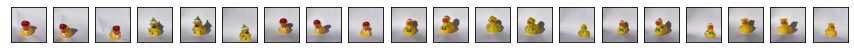

images[0].shape:  (126, 126, 3)
len(np_images):  281
np_images.shape:  (281, 126, 126, 3)


In [27]:
display(images, 20)
#np_images = np.array(images)
np_images = np.array(images, dtype='float32')
#np_images = np.array(images, dtype=np.float32)
print('images[0].shape: ', images[0].shape)
print('len(np_images): ',len(np_images))
print('np_images.shape: ',np_images.shape)

In [7]:
# Normalize the dataset 
# def normalize(images):
max_1 = np_images[:,:,:,0].max()
max_2 = np_images[:,:,:,1].max()
max_3 = np_images[:,:,:,2].max()
min_1 = np_images[:,:,:,0].min()
min_2 = np_images[:,:,:,1].min()
min_3 = np_images[:,:,:,2].min()

np_images[:,:,:,0] = (np_images[:,:,:,0]-min_1) /(max_1-min_1)
np_images[:,:,:,1] = (np_images[:,:,:,1]-min_2) /(max_2-min_2)
np_images[:,:,:,2] = (np_images[:,:,:,2]-min_3) /(max_3-min_3)


In [7]:
print(np_images[:,:,:,0].max())
print(np_images[:,:,:,1].max())
print(np_images[:,:,:,2].max())

1.0
1.0
1.0


In [8]:
# Randomize the images
num_images = np_images.shape[0]
shuffled_indices = np.random.permutation(num_images)
np_images = np_images[shuffled_indices]

In [9]:
x_train = np_images[0:int(np_images.shape[0]*0.8)]
x_test = np_images[int(np_images.shape[0]*0.8):np_images.shape[0]]
print(x_train.shape)
print(x_test.shape)

(224, 126, 126, 3)
(57, 126, 126, 3)


In [84]:
# # Preprocess the data 
# # something is wrong in preprocessing it makes all the pixels extremely small
# def preprocess(imgs):
#     """
#     Normalize and reshape the images
#     """
#     imgs = imgs.astype("float32") / 255.0
#     # imgs = np.pad(imgs, ((0, 0), (2, 2), (2, 2), (0,0)), constant_values=0.0)
#     # imgs = np.expand_dims(imgs, -1)
#     return imgs


# x_train = preprocess(x_train)
# x_test = preprocess(x_test)

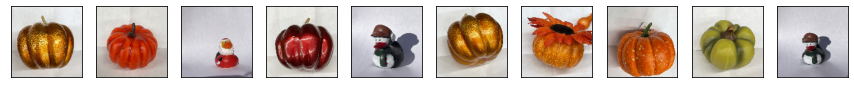

In [12]:
# Show some items of clothing from the training set
display(x_train, 10)

## 2. Build the autoencoder <a name="build"></a>

In [13]:
# Encoder
encoder_input = layers.Input(
    shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), name="encoder_input"
)
x = layers.Conv2D(32, (3, 3), strides=2, activation="relu", padding="same")(
    encoder_input
)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides=2, activation="relu", padding="same")(x)
shape_before_flattening = K.int_shape(x)[1:]  # the decoder will need this!

x = layers.Flatten()(x)
encoder_output = layers.Dense(EMBEDDING_DIM, name="encoder_output")(x)

encoder = models.Model(encoder_input, encoder_output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 126, 126, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 63, 63, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 encoder_output (Dense)      (None, 2)                 65538     
                                                                 
Total params: 158,786
Trainable params: 158,786
Non-trainable

In [14]:
# Decoder
decoder_input = layers.Input(shape=(EMBEDDING_DIM,), name="decoder_input")
x = layers.Dense(np.prod(shape_before_flattening))(decoder_input)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(
    128, (3, 3), strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    64, (3, 3), strides=2, activation="relu", padding="same"
)(x)
x = layers.Conv2DTranspose(
    32, (3, 3), strides=2, activation="relu", padding="same"
)(x)
decoder_output = layers.Conv2D(
    CHANNELS,
    (3, 3),
    strides=1,
    activation="sigmoid",
    padding="same",
    name="decoder_output",
)(x)

decoder = models.Model(decoder_input, decoder_output)
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 32768)             98304     
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 128)      147584    
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 64, 64, 64)       73792     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 128, 128, 32)     1846

In [30]:
# Autoencoder
autoencoder = tensorflow.keras.Sequential([encoder,decoder])
# autoencoder = models.Model(
#     encoder_input, decoder(encoder_output)
# )  # decoder(encoder_output)
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2)                 158786    
                                                                 
 model_1 (Functional)        (None, 128, 128, 3)       339011    
                                                                 
Total params: 497,797
Trainable params: 497,797
Non-trainable params: 0
_________________________________________________________________


## 3. Train the autoencoder <a name="train"></a>

In [31]:
# Compile the autoencoder
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [32]:
# Create a model save checkpoint
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="./checkpoint",
    save_weights_only=False,
    save_freq="epoch",
    monitor="loss",
    mode="min",
    save_best_only=True,
    verbose=0,
)
tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")

In [33]:
dgen = datagen.flow(x_train,batch_size=BATCH_SIZE, shuffle=False)

In [35]:
history = autoencoder.fit(datagen.flow(
    x_train,batch_size=BATCH_SIZE, shuffle=False),
    epochs=EPOCHS,
    validation_data=(x_test, x_test),
    callbacks=[model_checkpoint_callback, tensorboard_callback],
)

Epoch 1/125


ValueError: in user code:

    File "c:\Users\kamata3\Work\Brain\Brain_network\GNN\Models\Environments\GNN_1\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\kamata3\Work\Brain\Brain_network\GNN\Models\Environments\GNN_1\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\kamata3\Work\Brain\Brain_network\GNN\Models\Environments\GNN_1\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\kamata3\Work\Brain\Brain_network\GNN\Models\Environments\GNN_1\lib\site-packages\keras\engine\training.py", line 861, in train_step
        self._validate_target_and_loss(y, loss)
    File "c:\Users\kamata3\Work\Brain\Brain_network\GNN\Models\Environments\GNN_1\lib\site-packages\keras\engine\training.py", line 818, in _validate_target_and_loss
        raise ValueError(

    ValueError: Target data is missing. Your model was compiled with loss=binary_crossentropy, and therefore expects target data to be provided in `fit()`.


In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [137]:
# Save the final models
autoencoder.save("./models/autoencoder")
encoder.save("./models/encoder")
decoder.save("./models/decoder")

INFO:tensorflow:Assets written to: ./models/autoencoder\assets
INFO:tensorflow:Assets written to: ./models/encoder\assets
INFO:tensorflow:Assets written to: ./models/decoder\assets


## 4. Reconstruct using the autoencoder <a name="reconstruct"></a>

In [ ]:
n_to_predict = 5000
example_images = x_test[:n_to_predict]
#example_labels = y_test[:n_to_predict]

Example real decorative items


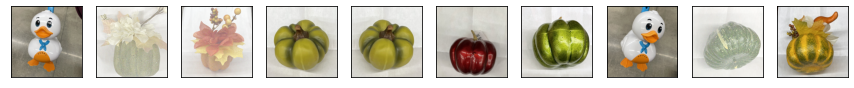

Reconstructions


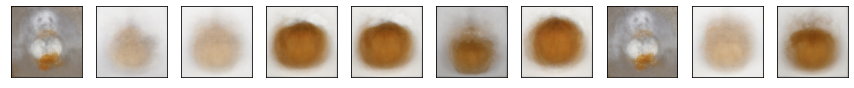

In [ ]:
predictions = autoencoder.predict(example_images)
print("Example real decorative items")
display(example_images)
print("Reconstructions")
display(predictions)

## 5. Embed using the encoder <a name="encode"></a>

In [140]:
# Encode the example images
embeddings = encoder.predict(example_images)

In [141]:
# Some examples of the embeddings
print(embeddings[:10])

[[ 0.16408412 -7.40295   ]
 [18.43369    -2.038718  ]
 [17.858692    2.31448   ]
 [ 5.675386   10.858741  ]
 [ 5.8116407  10.659974  ]
 [ 7.763861    0.85096985]
 [ 3.118853   13.516082  ]
 [ 1.4400092  -7.9222546 ]
 [17.103653    4.4105105 ]
 [ 7.057469    6.69057   ]]


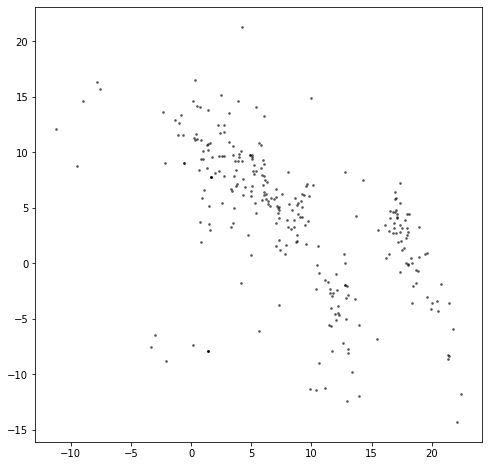

In [142]:
# Show the encoded points in 2D space
figsize = 8

plt.figure(figsize=(figsize, figsize))
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=3)
plt.show()

<ipython-input-156-b63b751df009>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


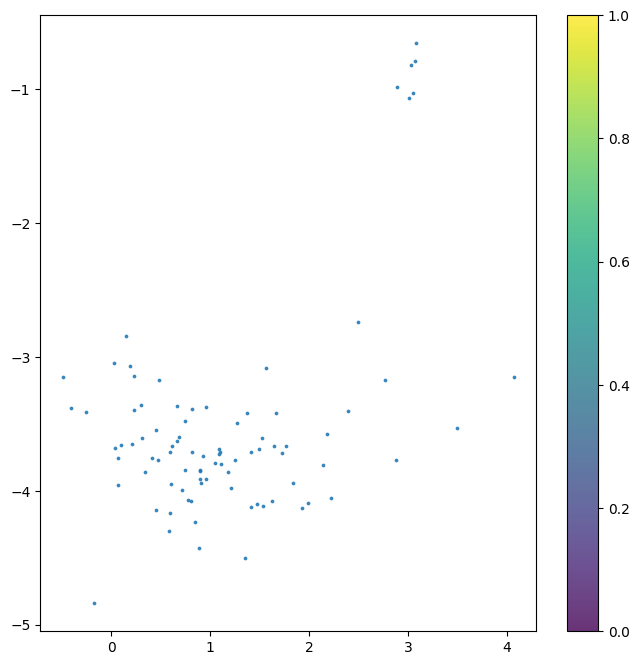

In [ ]:
# Colour the embeddings by their label (clothing type - see table)
example_labels = y_test[:n_to_predict]

figsize = 8
plt.figure(figsize=(figsize, figsize))
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    cmap="rainbow",
    # c=example_labels,
    alpha=0.8,
    s=3,
)
plt.colorbar()
plt.show()

## 6. Generate using the decoder <a name="decode"></a>

In [143]:
# Get the range of the existing embeddings
mins, maxs = np.min(embeddings, axis=0), np.max(embeddings, axis=0)

# Sample some points in the latent space
grid_width, grid_height = (6, 3)
sample = np.random.uniform(
    mins, maxs, size=(grid_width * grid_height, EMBEDDING_DIM)
)

In [144]:
# Decode the sampled points
reconstructions = decoder.predict(sample)

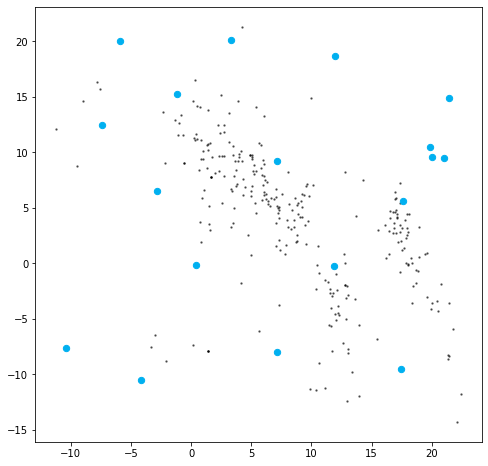

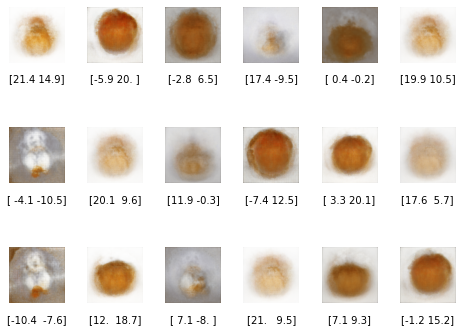

In [145]:
# Draw a plot of...
figsize = 8
plt.figure(figsize=(figsize, figsize))

# ... the original embeddings ...
plt.scatter(embeddings[:, 0], embeddings[:, 1], c="black", alpha=0.5, s=2)

# ... and the newly generated points in the latent space
plt.scatter(sample[:, 0], sample[:, 1], c="#00B0F0", alpha=1, s=40)
plt.show()

# Add underneath a grid of the decoded images
fig = plt.figure(figsize=(figsize, grid_height * 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_width * grid_height):
    ax = fig.add_subplot(grid_height, grid_width, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        str(np.round(sample[i, :], 1)),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(reconstructions[i, :, :], cmap="Greys")

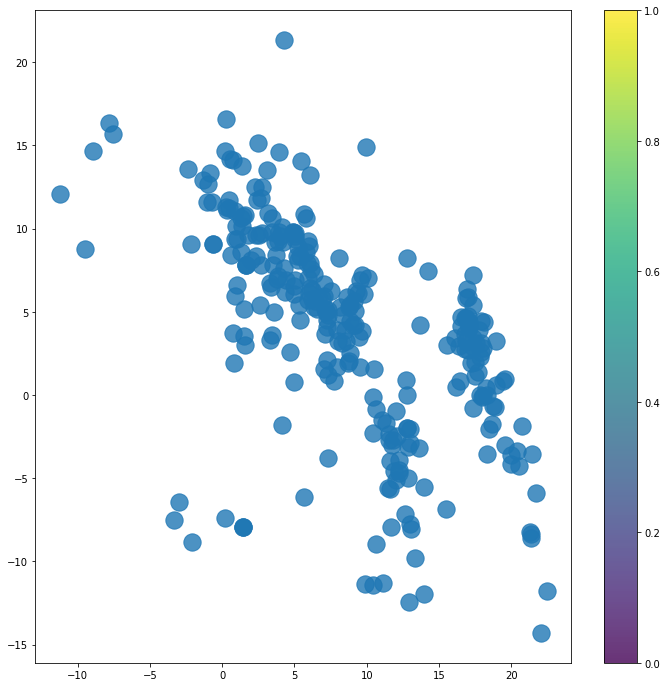

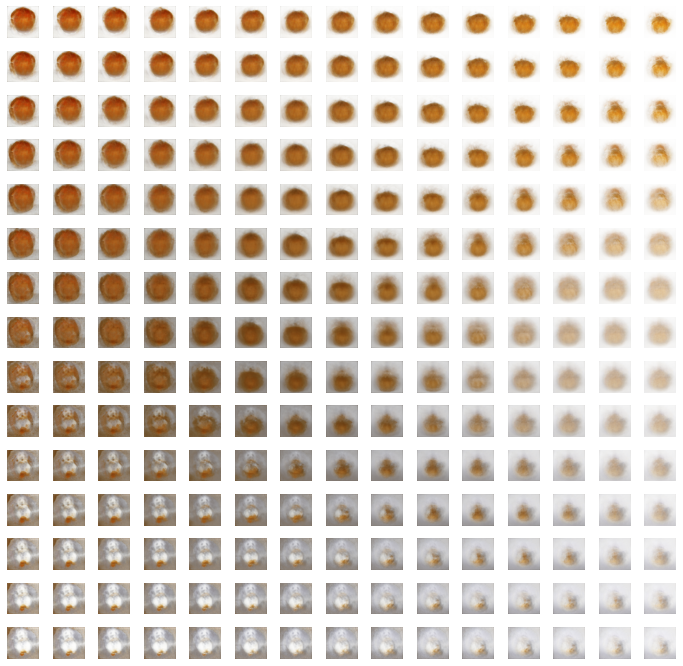

In [146]:
# Colour the embeddings by their label (clothing type - see table)
figsize = 12
grid_size = 15
plt.figure(figsize=(figsize, figsize))
plt.scatter(
    embeddings[:, 0],
    embeddings[:, 1],
    cmap="rainbow",
    # c=example_labels,
    alpha=0.8,
    s=300,
)
plt.colorbar()

x = np.linspace(min(embeddings[:, 0]), max(embeddings[:, 0]), grid_size)
y = np.linspace(max(embeddings[:, 1]), min(embeddings[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv)))

reconstructions = decoder.predict(grid)
# plt.scatter(grid[:, 0], grid[:, 1], c="black", alpha=1, s=10)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.axis("off")
    ax.imshow(reconstructions[i, :, :], cmap="Greys")